 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 3. Pandas & Matplotlib**
# Section 7. Pandas로 시각화하기

### _Objective_
1. Pandas에는 기본적으로 Matplotlib의 plot이 내장되어 있습니다. <br>
2. Pandas로 간편하게 데이터프레임을 시각화하는 방법을 배워보겠습니다. <br>

╚═════════════════════════════════════╝

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt  

import pandas as pd
import numpy as np

### [Optional. 시각화에서 한글 사용하기]

---

In [2]:
# 1. 나눔 폰트를 다운받기
!apt-get update -qq
!apt-get install fonts-nanum* -qq

/bin/sh: apt-get: command not found
/bin/sh: apt-get: command not found


In [3]:
import matplotlib.font_manager as fm
# 2. 나눔 폰트의 위치 가져오기 
system_font = fm.findSystemFonts() # 현재 시스템에 설치된 폰트
nanum_fonts = [font for font in system_font if "NanumBarunGothic.ttf" in font]
font_path = nanum_fonts[0] # 설정할 폰트의 경로

# 3. 나눔 폰트로 설정하기
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc("font",family=font_name)

# 4. 폰트 재설정하기
fm._rebuild()

# 5. (optional) minus 기호 깨짐 방지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# \[ I. DataFrame 시각화 \]

---

---

## 예제 데이터 )  학생의 시험 성적 추이

#### 데이터 ) 학생의 중학교 기간, 국영수 내신 성적 추이
`scores`

|과목| 1-1학기 중간 | 1-1학기 기말 | 1-2학기 중간 | 1-2학기 기말 | 2-1학기 중간 | 2-1학기 기말 | 2-2학기 중간 | 2-2학기 기말 |  3-1학기 중간 | 3-1학기 기말 | 3-2학기 중간 | 3-2학기 기말 |  
|---|--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |
|국어| 83 | 85 | 84 | 81 | 80 | 85 | 84 | 81 | 79 | 75 | 76 | 74 |
|영어| 86 | 90 | 91 | 89 | 92 | 90 | 87 | 85 | 87 | 84 | 82 | 80 |
|수학| 73 | 78 | 82 | 87 | 92 | 96 | 95 | 93 | 94 | 96 | 97 | 98 |

In [10]:
scores = np.array([
    [83, 85, 84, 81, 80, 85, 84, 81, 79, 75, 76, 74],
    [86, 90, 91, 89, 92, 90, 87, 85, 87, 84, 82, 80],
    [73, 78, 82, 87, 92, 96, 95, 93, 94, 96, 97, 98]])

columns = [
    "1-1중간","1-1기말","1-2중간","1-2기말",
    "2-1중간","2-1기말","2-2중간","2-2기말",
     "3-1중간","3-1기말","3-2중간","3-2기말"]
index = ["국어","영어","수학"]
score_df = pd.DataFrame(scores,
                        columns=columns,
                        index=index)

## 1. 기본 Plot 그리기

---


`df.plot`은 데이터프레임 내 변수들을 시각화하는 메소드입니다.

In [11]:
# 행과 열을 바꿉니다.
score_df = score_df.T
score_df

,국어,영어,수학
1-1중간,83,86,73
1-1기말,85,90,78
1-2중간,84,91,82
1-2기말,81,89,87
2-1중간,80,92,92
2-1기말,85,90,96
2-2중간,84,87,95
2-2기말,81,85,93
3-1중간,79,87,94
3-1기말,75,84,96


### (1) 기본 플랏 그리기

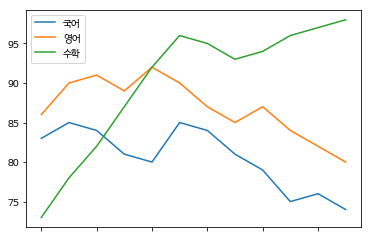

In [12]:
ax = score_df.plot()
plt.show()

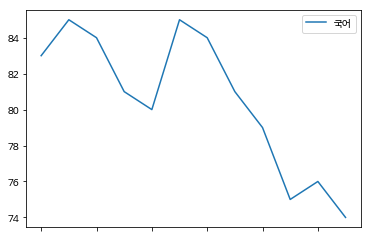

In [13]:
# 국어만 보고 싶다면 아래와 같이 할 수 있습니다.
score_df.plot(y="국어")
plt.show()

### (2) 제목, 축이름, 라벨 추가하기

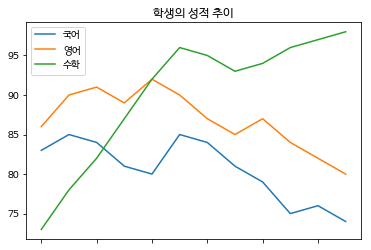

In [14]:
# 제목 추가하기
score_df.plot(title="학생의 성적 추이")
plt.show()

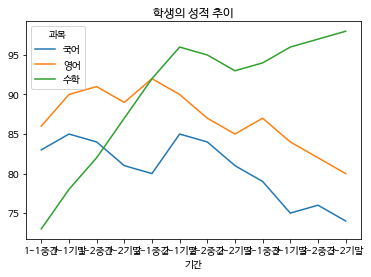

In [34]:
# 축이름과 라벨 추가하기

# index에 이름을 추가하면 자동으로 축이름이 달립니다.
score_df.columns.name = "과목"
score_df.index.name = "기간"

# xticks에 원하는 인덱스 위치값을 지정하면 라벨이 나타남
score_df.plot(title="학생의 성적 추이",
              xticks=np.arange(12))
plt.show()

### (3) subplot 그리기

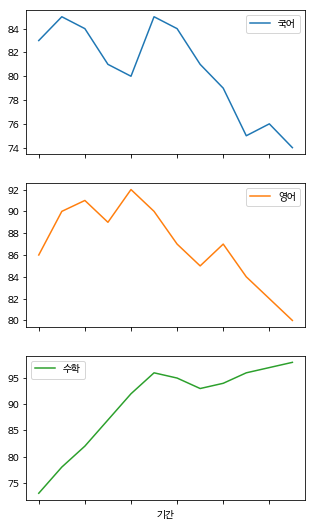

In [39]:
subplots = score_df.plot(subplots=True,
                         figsize=(5,10))
plt.show()

### (4) 범례 및 값의 범위 조절하기

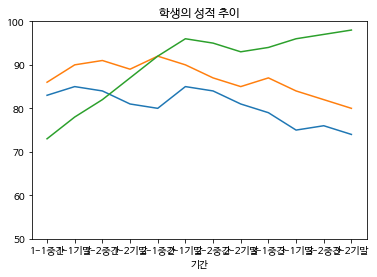

In [41]:
# 범례를 제거하고
# y값 범위을 50~100으로 설정하기
score_df.plot(title="학생의 성적 추이",
              legend=False,
              ylim=(50,100),
              xticks=np.arange(12))
plt.show()

## 2. 다양한 Plot 그리기

---


`df.plot`의 kind 인자를 통해 우리는 다양한 시각화를 설정할 수 있습니다.

###  예제 데이터 Ⅰ )  학생들의 국영수사과 성적표

#### 데이터 1) 중간고사, 학생들의 국영수사과 성적표

`middle_scores`

| 학생 번호 | 국어 | 영어 | 수학 | 사회 | 과학 |
|  ----   | --- |---| --- | --- | --- |
|0 |80 |92 |70 | 65 | 92 |
|1 |91 |75 |90 | 68 | 85 | 
|2 |86 |76 |42 | 72 | 88 |
|3 |77 |92 |52 | 60 | 80 |
|4 |75 |85 |85 | 92 | 95 |
|5 |96 |90 |95 | 81 | 72 |


In [51]:
middle_scores = np.array([
    [80,92,70,65,92],
    [91,75,90,68,85],
    [86,76,42,72,88],
    [77,92,52,60,80],
    [75,85,85,92,95],
    [96,90,95,81,72]
])

df = pd.DataFrame(middle_scores,
                 columns=["국어","영어","수학","사회","과학"])

### (1) 히스토그램 그리기

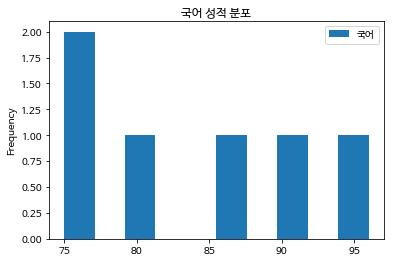

In [56]:
df.plot(y="국어",
        kind="hist",
        title="국어 성적 분포")
plt.show()

### (2) 바 그래프 그리기

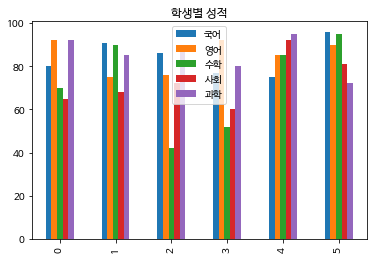

In [57]:
df.plot(kind="bar",
        title="학생별 성적")
plt.show()

### (3) 파이 그래프 그리기

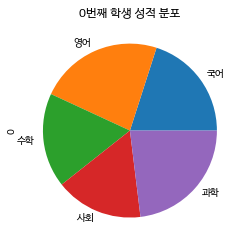

In [62]:
df.loc[0].plot(kind="pie",
              title="0번째 학생 성적 분포")

### (4) 산포도 그리기

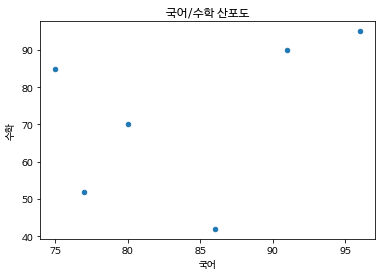

In [69]:
df.plot(x="국어",y="수학",
        kind="scatter",
        title='국어/수학 산포도')
plt.show()

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/03/07

---